This notebook will be mainly used for Coursera Capstone project.

# Segmenting and Clustering Neighborhoods in Toronto

In [1]:
pip install folium

     |████████████████████████████████| 93 kB 4.3 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

print('Libraries imported.')

Libraries imported.


## Web Scraping & Data Cleaning

In [49]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_list = pd.read_html(url)

In [50]:
df_list

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 5           M6A        North York   
 6           M7A  Downtown Toronto   
 7           M8A      Not assigned   
 8           M9A         Etobicoke   
 9           M1B       Scarborough   
 10          M2B      Not assigned   
 11          M3B        North York   
 12          M4B         East York   
 13          M5B  Downtown Toronto   
 14          M6B        North York   
 15          M7B      Not assigned   
 16          M8B      Not assigned   
 17          M9B         Etobicoke   
 18          M1C       Scarborough   
 19          M2C      Not assigned   
 20          M3C        North York   
 21          M4C         East York   
 22          M5C  Downtown Toronto   
 23          M6C              York   
 24          M7C      Not assigned   
 25         

In [51]:
df = df_list[0]

In [52]:
df.shape

(180, 3)

In [53]:
df.sample(10)

,Postal Code,Borough,Neighbourhood
172,M2Z,Not assigned,Not assigned
179,M9Z,Not assigned,Not assigned
111,M4R,Central Toronto,"North Toronto West, Lawrence Park"
161,M9X,Not assigned,Not assigned
41,M6G,Downtown Toronto,Christie
53,M9H,Not assigned,Not assigned
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
97,M8N,Not assigned,Not assigned
69,M7K,Not assigned,Not assigned
113,M6R,West Toronto,"Parkdale, Roncesvalles"


In [54]:
df_borough_notassigned = df.loc[df['Borough'] == 'Not assigned']

In [55]:
df_borough_notassigned

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
7,M8A,Not assigned,Not assigned
10,M2B,Not assigned,Not assigned
15,M7B,Not assigned,Not assigned
16,M8B,Not assigned,Not assigned
19,M2C,Not assigned,Not assigned
24,M7C,Not assigned,Not assigned
25,M8C,Not assigned,Not assigned
28,M2E,Not assigned,Not assigned


In [56]:
df_borough_notassigned.shape

(77, 3)

In [57]:
df = df[df.Borough != 'Not assigned']

In [58]:
df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [59]:
df.loc[df['Neighbourhood'] == 'Not assigned']

,Postal Code,Borough,Neighbourhood


In [60]:
df = df.reset_index(drop=True)

In [61]:
df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [62]:
df.shape

(103, 3)

## Adding Latitude & Longitude values to df

In [63]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [64]:
df = pd.merge(df,lat_lon,on='Postal Code')

In [65]:
df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [66]:
toronto_df = df[df['Borough'].str.contains('Toronto',regex=False)]
toronto_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [67]:
toronto_map = folium.Map(location=[43.654260,-79.360636],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(toronto_df['Latitude'],toronto_df['Longitude'],toronto_df['Borough'],toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(toronto_map)
toronto_map

In [68]:
toronto_clustering = toronto_df.drop(['Postal Code','Borough','Neighbourhood'],1)

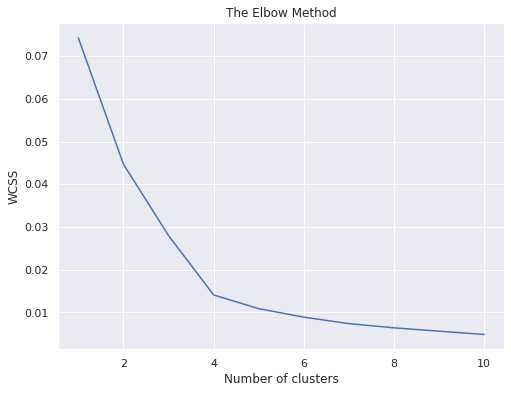

In [69]:
#try to find optimal k using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(toronto_clustering)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see here, the optimal number of cluster for this dataset is 4.

In [70]:
k=4
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
toronto_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [71]:
# create map
map_clusters = folium.Map(location=[43.654260,-79.360636],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighbourhood'], toronto_df['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters